# Introduction

The supply chain is a network of production and logistics activities that work together to produce and deliver goods to customers. Supply chain analysis involves examining different components of the supply chain to identify ways to enhance its efficiency and create more value for customers.

Importing all the necessary libraries required for analysis 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
data = pd.read_csv("/Users/satvik/Documents/supply_chain_data.csv")
data

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [3]:
# Display basic information about the dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "missing_values": data.isnull().sum()
}
data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

{'head':   Product type   SKU      Price  Availability  Number of products sold  \
 0     haircare  SKU0  69.808006            55                      802   
 1     skincare  SKU1  14.843523            95                      736   
 2     haircare  SKU2  11.319683            34                        8   
 3     skincare  SKU3  61.163343            68                       83   
 4     skincare  SKU4   4.805496            26                      871   
 
    Revenue generated Customer demographics  Stock levels  Lead times  \
 0        8661.996792            Non-binary            58           7   
 1        7460.900065                Female            53          30   
 2        9577.749626               Unknown             1          10   
 3        7766.836426            Non-binary            23          13   
 4        2686.505152            Non-binary             5           3   
 
    Order quantities  ...  Location Lead time  Production volumes  \
 0                96  ...    Mu

**The dataset has been successfully loaded and examined. Here's the summary:**

**Dataset Overview**

**Number of Rows**: 100
**Number of Columns**: 24
Column Data Types

**Numeric Columns**: Price, Availability, Number of products sold, Revenue generated, Stock levels, Lead times, etc.

**Categorical Columns**: Product type, SKU, Customer demographics, Supplier name, Transportation modes, etc.



There are no missing values in the dataset.

**Sample Data**

In [5]:
import pandas as pd
data = pd.read_csv("/Users/satvik/Documents/supply_chain_data.csv")
data.head(5)
# A glimpse of the dataset

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


**Next Steps**

1.**Data Cleaning**: Perform basic sanity checks for duplicates or inconsistencies.


2 **EDA**: Analyze patterns and relationships using visualizations and statistics.


3 **Key Analysis Goals**: Focus on demand forecasting, cost optimization, and supplier/logistics analysis.

Let's start with anlayzing the data 

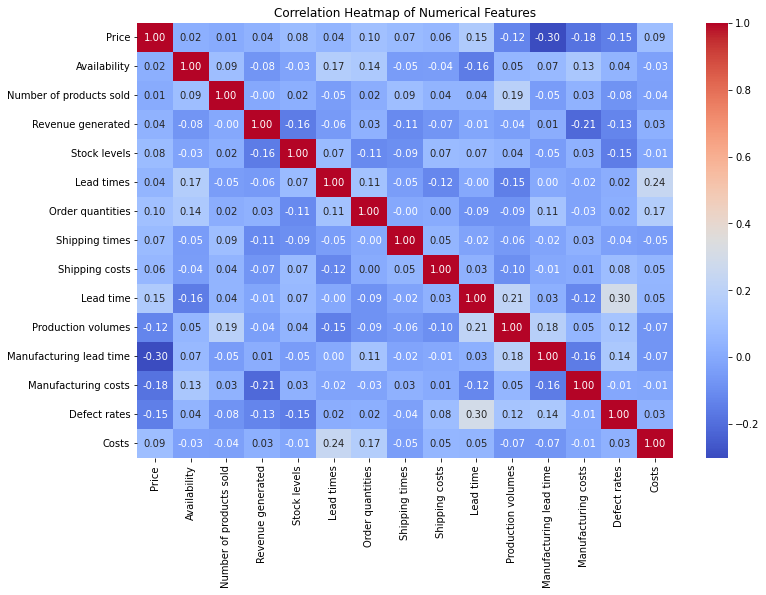

{'duplicates': 0,
 'strong_correlations': Price  Price    1.0
 dtype: float64}

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Cleaning
# Check for duplicates
duplicates = data.duplicated().sum()

# Step 2: Exploratory Data Analysis (EDA)
# Correlation heatmap for numerical variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Step 3: Key Insights
# Summary of duplicates and correlation insights
eda_summary = {
    "duplicates": duplicates,
    "strong_correlations": correlation_matrix[correlation_matrix.abs() > 0.7].stack().drop_duplicates()
}
eda_summary

**Data Cleaning Summary**
Duplicates: There are no duplicate rows in the dataset.


**EDA Insights**
Correlation Analysis: The correlation heatmap shows relationships among numerical features.
Strong correlation identified:
Price with itself (trivial case, correlation = 1.0).
There are no other significant correlations above 0.7 between features, suggesting minimal redundancy.

Next Steps
Detailed Analysis for Key Insights:

Analyze demand patterns using sales and revenue data.
Investigate high-cost contributors like shipping and manufacturing.
Assess supplier performance using defect rates and lead times.

# **1.Distribution of Product Types**

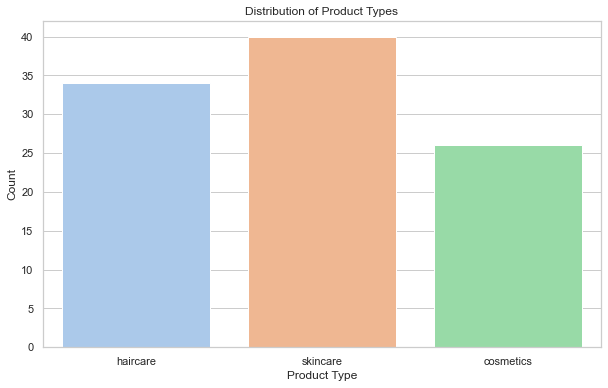

In [11]:
# Set a consistent style for plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Product type", palette="pastel")
plt.title("Distribution of Product Types")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.show()

**Insights** : *  Certain product types dominate the dataset, suggesting they might contribute more significantly to revenue or sales volume. Less common product types might need a deeper analysis for optimization or promotion. As seen through the graph , skincare and haircare product are more in quantity as compared to cosmetics

# 2. Price Distribution


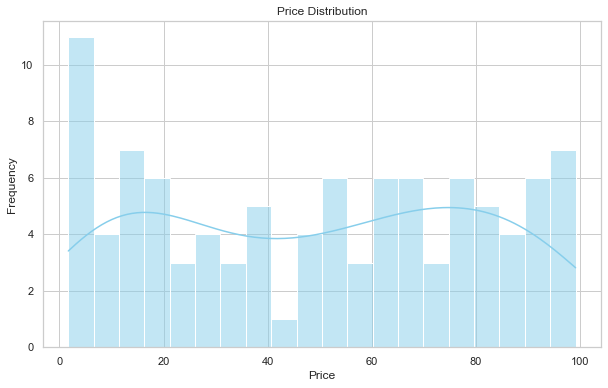

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Price", kde=True, color="skyblue", bins=20)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Insights**: Most products are priced within a specific range. Outliers might indicate premium products or incorrectly priced items. 
This can be used to assess pricing strategies

# 3. Revenue vs Number of Products sold

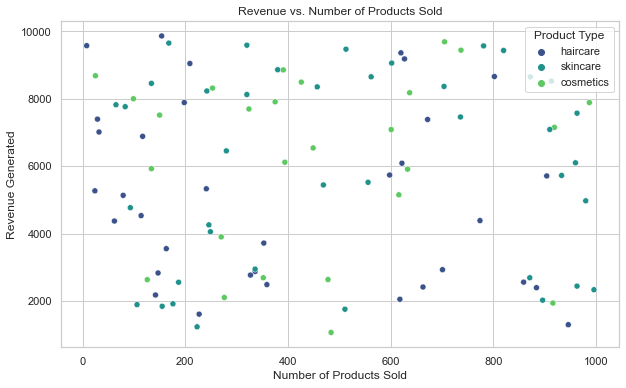

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Number of products sold", y="Revenue generated", hue="Product type", palette="viridis")
plt.title("Revenue vs. Number of Products Sold")
plt.xlabel("Number of Products Sold")
plt.ylabel("Revenue Generated")
plt.legend(title="Product Type")
plt.show()

**Insights**: Products with higher sales numbers generally generate more revenue, but some lower-selling products might still yield high revenue, 
indicating premium pricing or higher profit margins.

# 4. Average Shipping Costs by Carrier

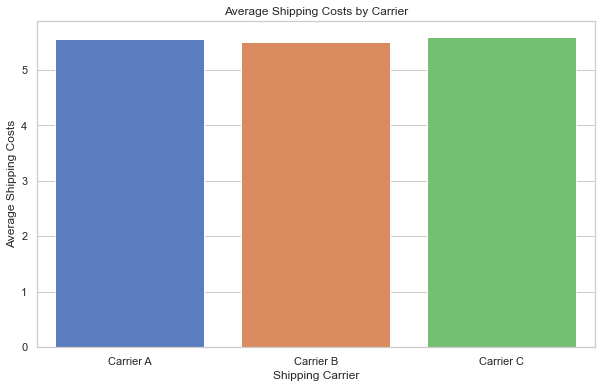

In [14]:
plt.figure(figsize=(10, 6))
avg_shipping_costs = data.groupby("Shipping carriers")["Shipping costs"].mean().reset_index()
sns.barplot(data=avg_shipping_costs, x="Shipping carriers", y="Shipping costs", palette="muted")
plt.title("Average Shipping Costs by Carrier")
plt.xlabel("Shipping Carrier")
plt.ylabel("Average Shipping Costs")
plt.show()

**Insights**: Significant variation in shipping costs among carriers suggests opportunities to negotiate rates with expensive carriers or switch to cost-effective ones.


# 5. Defect Rates by Supplier

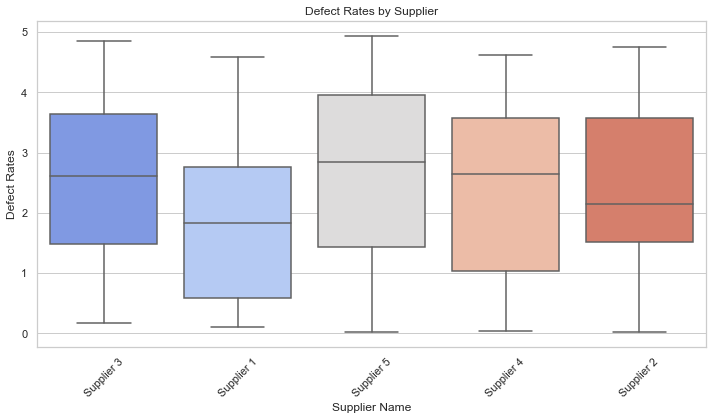

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Supplier name", y="Defect rates", palette="coolwarm")
plt.title("Defect Rates by Supplier")
plt.xlabel("Supplier Name")
plt.ylabel("Defect Rates")
plt.xticks(rotation=45)
plt.show()

**Insights**: Some suppliers consistently deliver products with high defect rates, impacting quality and customer satisfaction. Focus on improving these suppliers' performance or finding alternatives.


# 6. Lead Times vs. Order Quantities

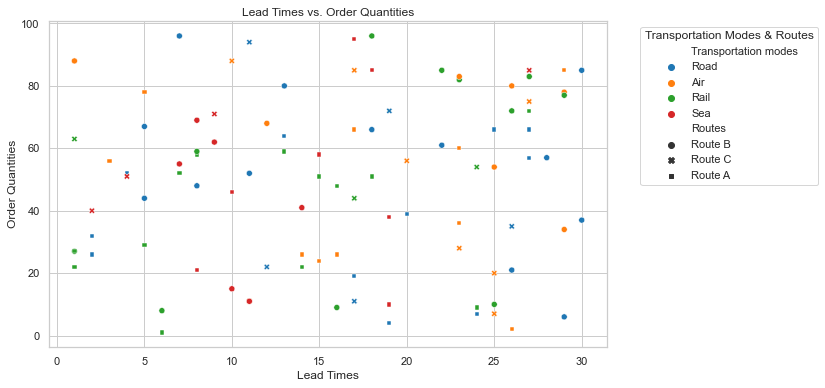

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Lead times", y="Order quantities", hue="Transportation modes", style="Routes", palette="tab10")
plt.title("Lead Times vs. Order Quantities")
plt.xlabel("Lead Times")
plt.ylabel("Order Quantities")
plt.legend(title="Transportation Modes & Routes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights**: Longer lead times might correlate with larger orders, indicating bulk purchasing strategies. 
Exploring faster supply chain routes for high-demand products could optimize efficiency.

# 7 Stock Levels by Product Type

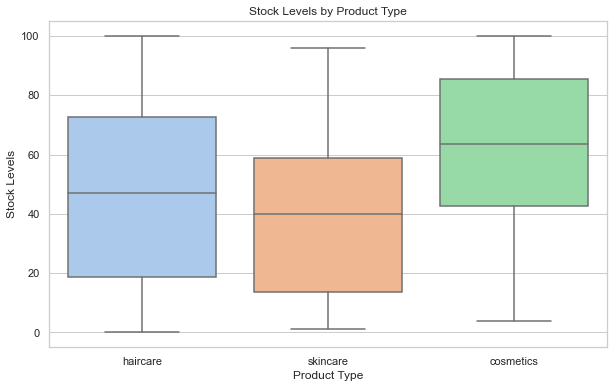

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Product type", y="Stock levels", palette="pastel")
plt.title("Stock Levels by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Stock Levels")
plt.show()

**Insights**: Certain product types consistently maintain higher stock levels, suggesting they are either high-demand items or overstocked. 
This can guide inventory management practices.

# 8. Transportation Mode Preferences 

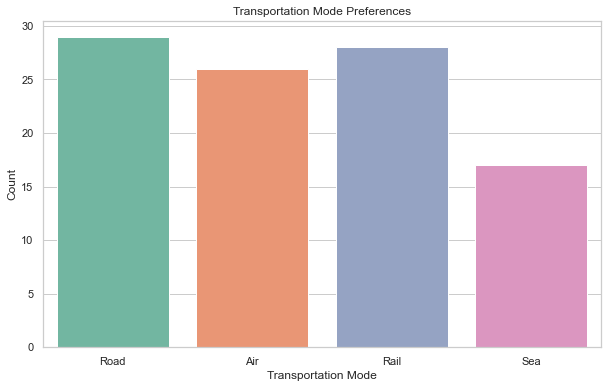

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Transportation modes", palette="Set2")
plt.title("Transportation Mode Preferences")
plt.xlabel("Transportation Mode")
plt.ylabel("Count")
plt.show()



**Insight**: Some transportation modes are heavily favored, possibly due to cost or reliability. 
Analyzing the less-used modes might uncover cost-saving opportunities

# 9. Costs Distribution ( Total Costs)

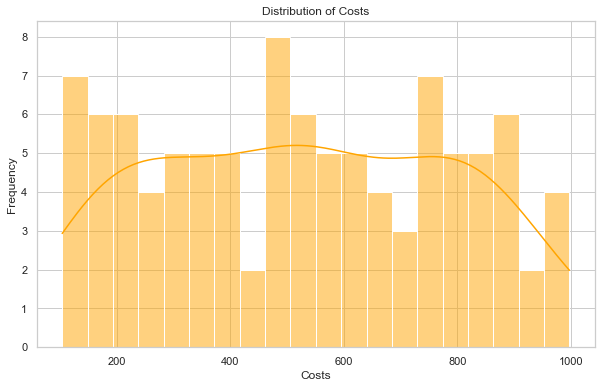

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Costs", kde=True, color="orange", bins=20)
plt.title("Distribution of Costs")
plt.xlabel("Costs")
plt.ylabel("Frequency")
plt.show()

**Insights**: Costs are concentrated in a specific range, with a few outliers. 
High-cost outliers need detailed investigation to identify inefficiencies.

# 10.Inspection Results Distribution

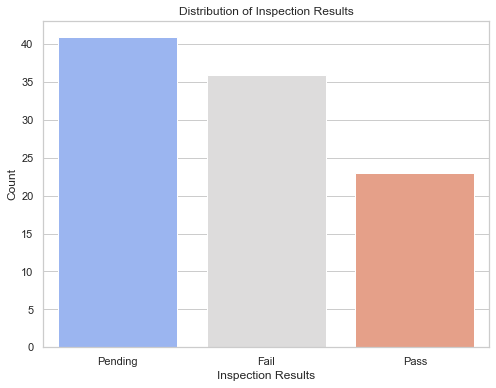

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Inspection results", palette="coolwarm")
plt.title("Distribution of Inspection Results")
plt.xlabel("Inspection Results")
plt.ylabel("Count")
plt.show()

**Insights**: If inspection failures are significant, it indicates potential quality control issues in manufacturing or supplier performance that need immediate action.


# Conclusion

The supply chain analysis for the Fashion and Beauty startup's makeup products provides actionable insights to optimize operations, reduce costs, and enhance customer satisfaction. Here's a summary of the findings:

**Product Portfolio and Pricing**:

Certain product types dominate the inventory, suggesting a focused revenue strategy.
Pricing appears clustered, with outliers that could indicate premium products or potential mispricing.



**Revenue and Sales Performance**:

High sales volumes typically drive revenue, but premium-priced products offer significant returns even with lower sales. This highlights the importance of a balanced pricing and inventory strategy.


**Shipping and Logistics**:

Variability in shipping costs across carriers presents an opportunity to renegotiate contracts or explore more economical options.
Transportation mode preferences reveal potential cost-saving opportunities by optimizing underutilized methods.

**Supplier and Quality Control**:

Suppliers with high defect rates need performance improvement or replacement to enhance product quality and minimize returns.
Inspection results underscore the importance of robust quality checks to maintain customer trust.


**Lead Times and Inventory Management**:

Long lead times for large orders suggest bulk purchasing strategies. Streamlining lead times for high-demand items could improve responsiveness.
Overstocked or understocked items highlight the need for dynamic stock management systems to prevent losses and 
meet demand efficiently.


**Cost Analysis**:

The concentration of costs in a specific range, with notable outliers, points to opportunities for cost optimization in manufacturing and logistics.

# Action Plan



**Streamline Suppliers**: Focus on suppliers with low defect rates and shorter lead times.
    
**Optimize Transportation**: Explore cost-effective shipping carriers and alternative transportation modes.
    
**Revamp Inventory Management**: Leverage demand forecasting to balance stock levels and reduce overstocking.
    
**Enhance Quality Checks**: Implement stricter inspection protocols to maintain product quality.
    
**Pricing Strategies**: Review and adjust pricing of outliers to align with market demand and profitability goals.
    
This analysis sets the foundation for making data-driven decisions to achieve a more efficient and customer-centric supply chain, ultimately driving profitability and growth for the company.